In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [ ]:
# Display the first few rows of the training data
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Summary statistics of the training data
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Check for missing values
print(train_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Check the data types
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


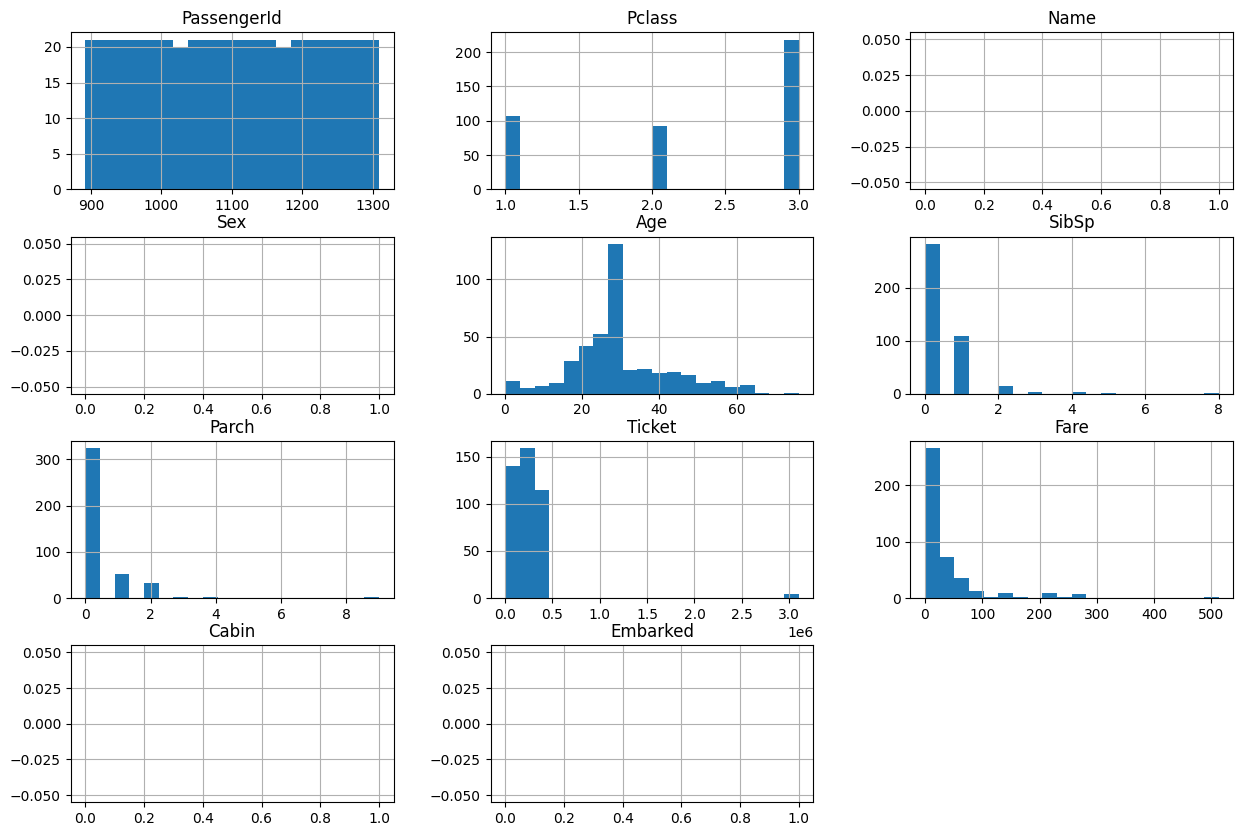

In [74]:
df.hist(bins=20, figsize=(15,10))
plt.show()

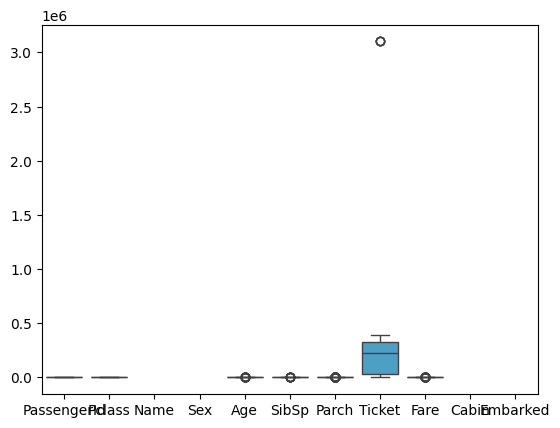

In [75]:
sns.boxplot(data=df)
plt.show()

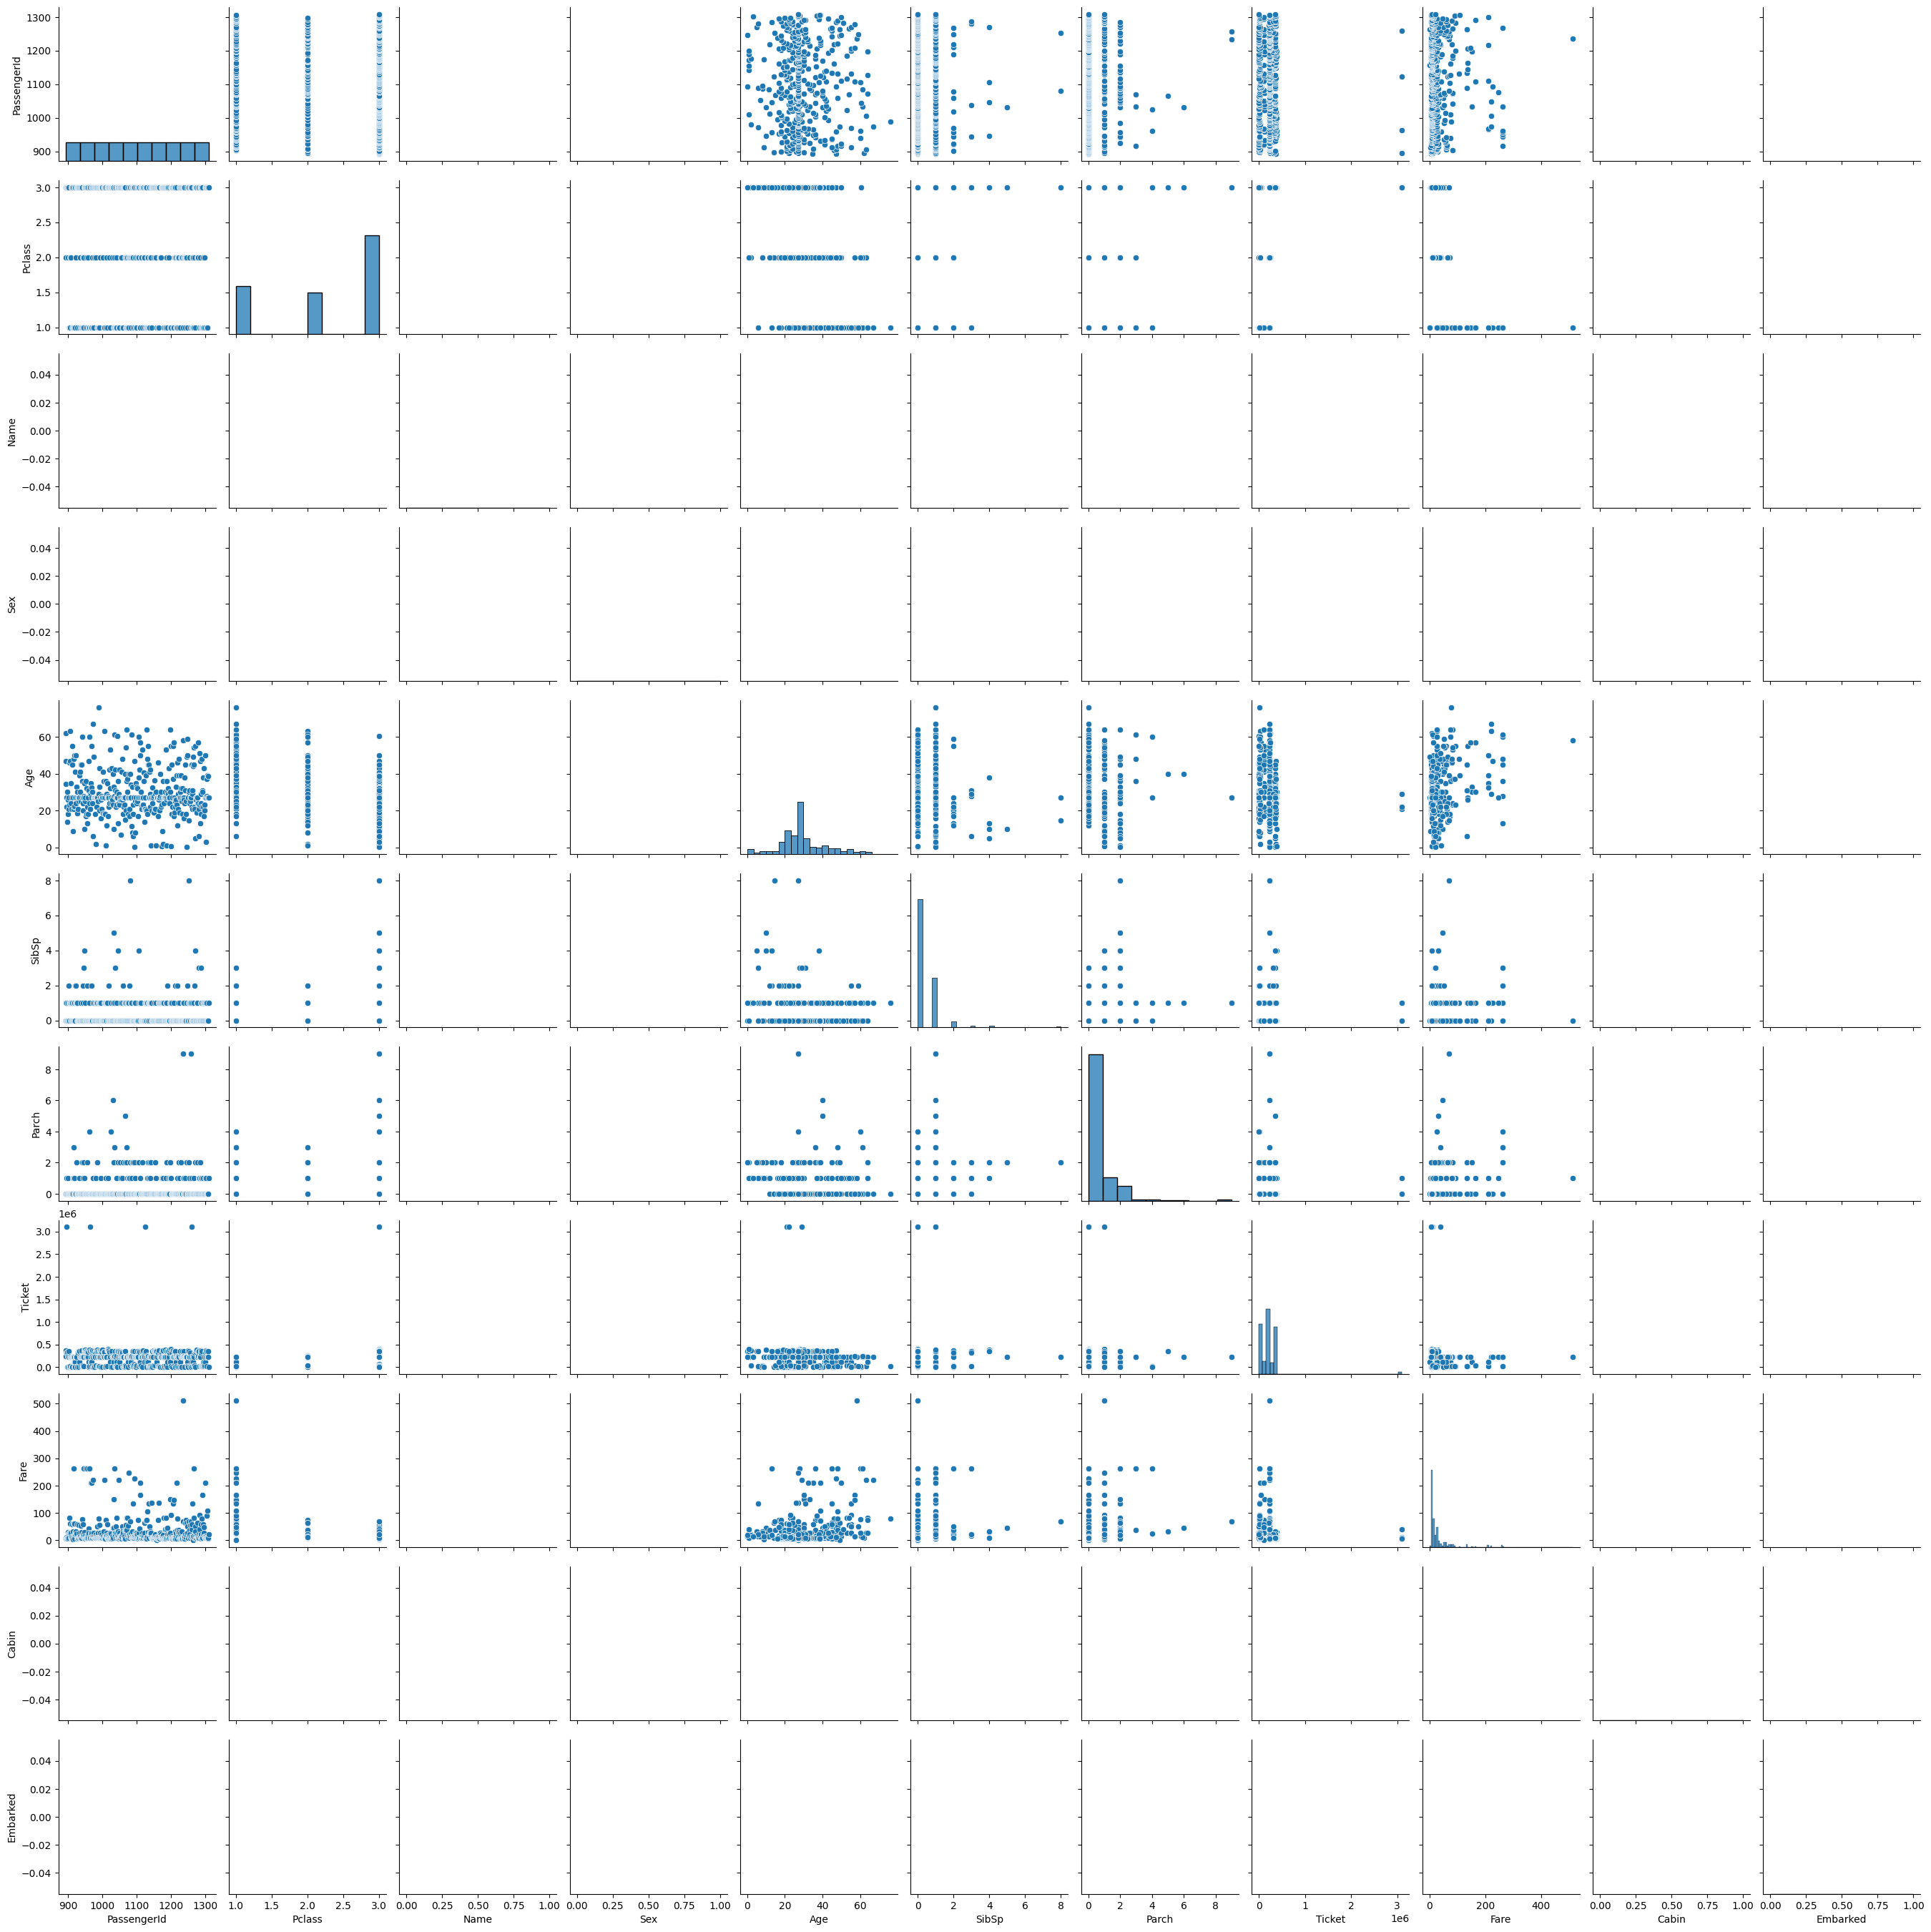

In [76]:
sns.pairplot(df)
plt.show()

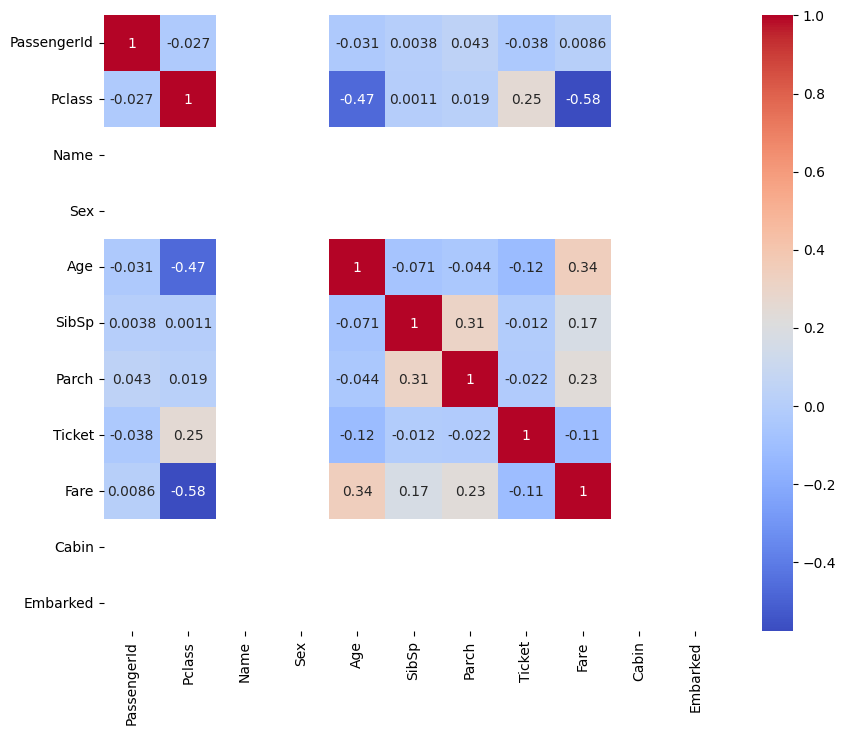

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Fill missing values for 'Age' with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [ ]:
# Fill missing 'Embarked' values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [ ]:
train_data.drop(columns=['Cabin'], inplace=True)


In [ ]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [ ]:
train_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [ ]:
print(train_data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         2
1         1       1    1  38.0      1      0  71.2833         0
2         1       3    1  26.0      0      0   7.9250         2
3         1       1    1  35.0      1      0  53.1000         2
4         0       3    0  35.0      0      0   8.0500         2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# Split data into features and target variable
X = train_data.drop(columns='Survived')
y = train_data['Survived']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

In [ ]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-score: 0.76
ROC-AUC: 0.80


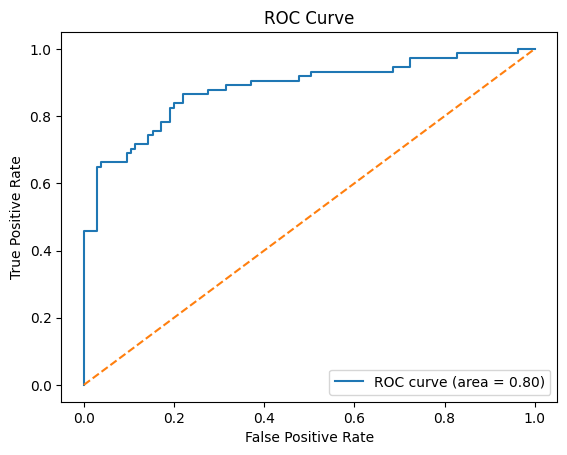

In [ ]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))

    Feature  Coefficient
1       Sex     2.596052
5      Fare     0.002534
2       Age    -0.030440
4     Parch    -0.110909
6  Embarked    -0.218320
3     SibSp    -0.294532
0    Pclass    -0.930826


1. **What is the difference between precision and recall?**


**Precision**


Precision measures the proportion of positive predictions that are actually correct. It answers the question:

"Out of all the instances that the model predicted as positive, how many are truly positive?"

**Interpretation:**

1. High Precision: Indicates a low rate of false positives. The model is conservative in predicting positive cases and is usually correct when it does so.
2. Low Precision: Indicates a high rate of false positives. The model frequently misclassifies negative instances as positive.



**Recall**


Recall measures the proportion of actual positive cases that the model correctly identified. It answers the question:

"Out of all the true positive instances, how many did the model successfully predict?"

**Interpretation:**

1. **High Recall:** Indicates that the model captures most of the positive cases. Few positives are missed.

2. **Low Recall:** Indicates that the model misses many positive cases, resulting in a high number of false negatives.


**Difference Between Precision and Recall**

Focus:

Precision focuses on the quality of positive predictions (how correct positive predictions are).
Recall focuses on the quantity of positive predictions (how many positive cases are captured).

Trade-Off:

Increasing precision often results in lower recall and vice versa.
Adjusting the decision threshold of the classifier can balance precision and recall depending on the application needs.

2. **What is cross-validation, and why is it important in binary classification?**

Cross-validation is a statistical method used to estimate the skill of machine learning models. It is primarily used to assess how the results of a predictive model will generalize to an independent dataset. Cross-validation is crucial for:

Model Evaluation: Providing an unbiased assessment of a model's performance.
Model Selection: Helping in selecting the best model and tuning hyperparameters.
Avoiding Overfitting: Ensuring that the model generalizes well to new data.


**Common Methods:**

1. K-Fold Cross-Validation
2. Stratified K-Fold Cross-Validation
3. Leave-One-Out Cross-Validation (LOOCV)


**Why is Cross-Validation Important in Binary Classification?**

1. Reliable Performance Estimation

Variability Reduction: Single train/test splits can lead to high variance in performance metrics due to random data partitioning.
Robust Metrics: Cross-validation averages the performance over multiple splits, providing a more reliable estimate.

2. Model Selection and Hyperparameter Tuning

Comparative Analysis: Enables comparison of different models or parameter settings on the same data splits.
Optimal Parameters: Helps in finding the hyperparameters that yield the best generalized performance.

3. Overfitting Detection

Generalization Check: By testing the model on unseen data in each fold, cross-validation assesses if the model is overfitting the training data.
Preventing Overfitting: Encourages models that perform consistently across different subsets.